In [19]:
import cv2, glob, sys, os
import numpy as np
import pandas as pd
import numpy.random as rd
import scipy as sp
from scipy import stats as st
from collections import Counter
from multiprocessing import Process, Manager
import time,sys
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import animation as ani
from datetime import datetime as dt
import seaborn as sns
#sns.set(style="whitegrid", palette="muted", color_codes=True)
%matplotlib inline
%config InlineBackend.figure_format='retina'
import sys
import os
import IPython.display as ipyd

plt.rcParams["patch.force_edgecolor"] = True

# OS判別 ======================
flag_win32 = False
try:
    os.uname()
except AttributeError:
    flag_win32 = True

# Mac用フォント設定
if not flag_win32:
    from matplotlib import font_manager
    font_path = '/Library/Fonts/Osaka.ttf'
    font_prop = font_manager.FontProperties(fname=font_path)
    matplotlib.rcParams['font.family'] = font_prop.get_name()
    plt.rcParams['font.family'] = 'Osaka'

In [11]:


# サンプルごとの平均、分散を算出する関数
def sample_to_mean_var(sample):
    mean = np.mean(sample)
    var  = np.var(sample)
    return [mean, var]

# 平均、分散のヒストグラムを描画する関数
def plot_mean(mu, dist_name=""):
    bins = 40

    # 標本平均のヒストグラム
    plt.figure(figsize=(7,5))
    plt.hist(mu, bins=bins, normed=True, color="plum")
    plt.title("mu from %s distribution"%(dist_name))


def plot_hist(data, bins, title =""):
    plt.figure(figsize=(9,5))
    plt.title(title)
    plt.hist(data, bins, color="lightgreen", normed=True)

theoretical_mean=10.0, theoretical_var=99.99999999999999


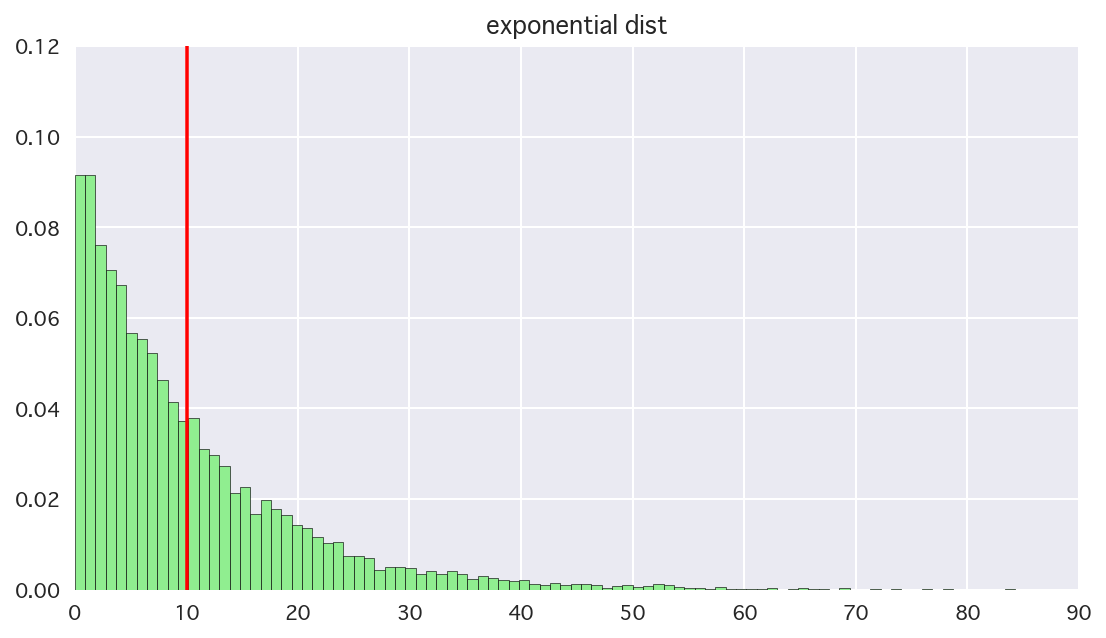

In [12]:
# サンプル用パラメータ
n = 10000
sample_size = 10000
#sample_size = 20

# 指数分布のグラフ描画
lam = 0.1
theoretical_mean = 1/lam
theoretical_var  = 1/lam**2
print("theoretical_mean={}, theoretical_var={}".format(theoretical_mean, theoretical_var))


x = rd.exponential(1./lam, size=sample_size)
m = np.mean(x)
plt.figure(figsize=(9,5))
plt.title("exponential dist")
plt.hist(x, 100, color="lightgreen", normed=True)
plt.plot([m, m], [0, 0.12], "r")
plt.ylim(0, 0.12)
plt.xlim(0, 90)
plt.show()

In [13]:
# 指数分布のグラフ描画 アニメーション
rd.seed = 71
lam = 0.1
theoretical_mean = 1/lam
theoretical_var  = 1/lam**2
print("theoretical_mean={}, theoretical_var={}".format(theoretical_mean, theoretical_var))

num_frame = 10.
x_range= 7

def animate(nframe):
    global num_frame, fig
    plt.clf()
    x = rd.exponential(1./lam, size=sample_size)
    m = np.mean(x)
    plt.title("exponential dist, i={0:d}".format(int(nframe)))
    plt.hist(x, 100, color="lightgreen", normed=True)
    plt.plot([m, m], [0, 0.12], "r")
    plt.xlim(0, 120)
    plt.ylim(0, 0.12)
    #fig.tight_layout()
    #plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

fig = plt.figure(figsize=(9,5))
left = 0.05
bottom = 0.05
width = 0.9
height = 0.9
ax = fig.add_axes([left, bottom, width, height])
anim = ani.FuncAnimation(fig, animate, frames=int(num_frame))
anim.save('exp_hist.gif', writer='imagemagick', fps=5, dpi=128)

plt.close()

theoretical_mean=10.0, theoretical_var=99.99999999999999


In [14]:
ipyd.Image(url='exp_hist.gif?{}'.format(rd.uniform()), height=800, width=800)


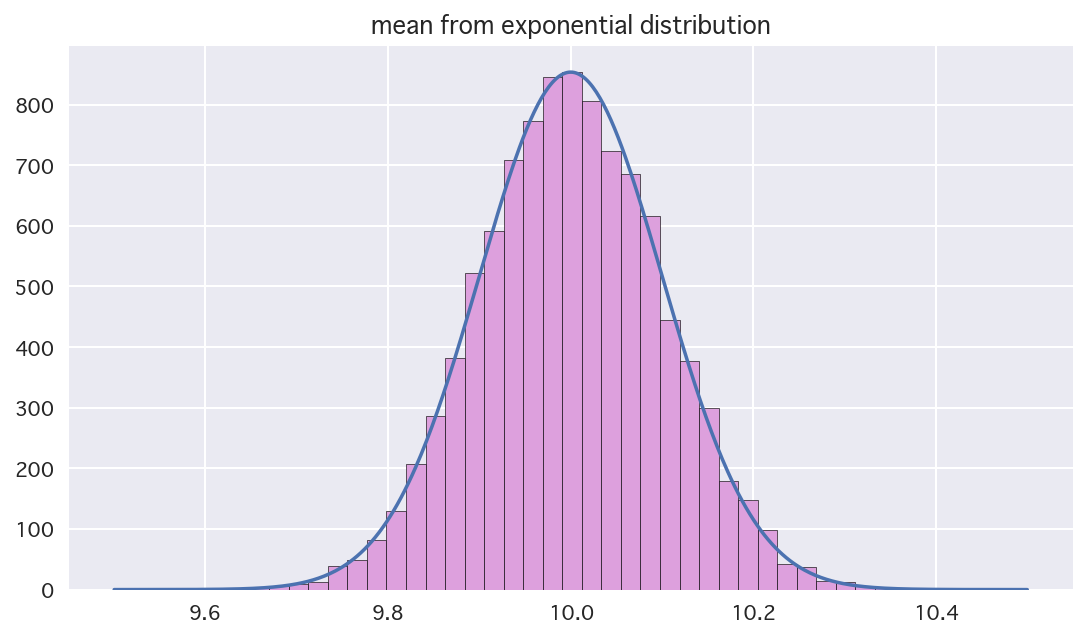

In [15]:
# 指数分布をたくさん生成して標本平均、標本分散のヒストグラムを描画
lam = 0.1
mean = np.array([np.mean(rd.exponential(1./lam, size=sample_size)) for i in range(n)])

bins = 40

# 標本平均のヒストグラム
plt.figure(figsize=(9,5))
out = plt.hist(mean, bins=bins, normed=False, color="plum")
plt.title("mean from %s distribution"%("exponential"))

# 理論正規分布
xx = np.linspace(9.5, 10.5, 501)
f = st.norm.pdf(xx, theoretical_mean, np.sqrt(theoretical_var/sample_size))
plt.plot(xx, f*n*np.diff(out[1])[0])

In [16]:
np.sqrt(theoretical_var/sample_size)

0.099999999999999992

# 同一でない分布からのサンプリングの中心極限定理

In [2]:
n = 100000
sample_size = 1000
rvs_list = []
m_list = []
for i in range(n):
    unif_rvs = st.uniform.rvs(4.5, size=sample_size) # 平均5の一様分布
    beta_rvs = st.beta.rvs(a=3, b=3, size=sample_size) # 平均0.5のβ分布
    gamma_rvs = st.gamma.rvs(a=3, size=sample_size) # 平均3のガンマ分布
    chi2_rvs = st.chi2.rvs(df=5, size=sample_size) # 平均５のカイ二乗分布
    exp_rvs = st.expon.rvs(loc=0, size=sample_size) # 平均1の指数分布
    rvs = np.array([unif_rvs, beta_rvs, gamma_rvs, chi2_rvs, exp_rvs]).flatten()
    m_list.append(np.mean(rvs))
    rvs_list.append(rvs)
    #plt.hist(rvs)
    #plt.show()

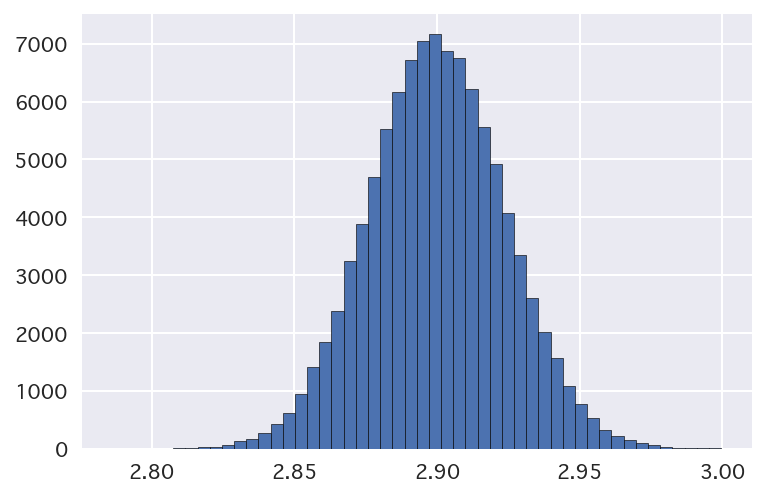

In [3]:
plt.hist(m_list, bins=50)
plt.show()

In [5]:
# 様々なのグラフ描画 アニメーション
rd.seed = 71
num_frame = 50.

def animate(nframe):
    global num_frame, fig
    plt.clf()
    m = m_list[int(nframe)]
    rvs = rvs_list[int(nframe)]
    plt.hist(rvs, bins=30, normed=True)
    plt.plot([m, m], [0, .5], "r")
    plt.xlim(0,20)

fig = plt.figure(figsize=(9,5))
anim = ani.FuncAnimation(fig, animate, frames=int(num_frame))
anim.save('mixed_dist.gif', writer='imagemagick', fps=5, dpi=128)

plt.close()

In [6]:
ipyd.Image(url='mixed_dist.gif?{}'.format(rd.uniform()), height=800, width=800)

In [100]:
# パラメーターも１つ１つ異なる場合
n = 10000
sample_size = 1000
rvs_list = []
m_list = []

m_unif = st.uniform.rvs(4, 2, size=sample_size)
m_beta_a = st.uniform.rvs(4, 2, size=sample_size)
m_beta_b = st.uniform.rvs(4, 2, size=sample_size)
m_gamma = rd.randint(2,5,size=sample_size)
m_chi2_df = rd.randint(3,6,size=sample_size)
m_exp = st.uniform.rvs(4, 2, size=sample_size)

def gen_random_state():
    return int(dt.now().timestamp() * 10**6) - 1492914610000000 + rd.randint(0, 1000000)

def create_rvs(n):
    #rd.seed = int(dt.now().timestamp() * 10**6) - 1492914610000000 + rd.randint(0, 1000000)
    print("[START]")
    for _ in range(n):
        unif_rvs =  [st.uniform.rvs(m, size=1, random_state=gen_random_state()) for m in m_unif] # 平均5の一様分布
        beta_rvs =  [st.beta.rvs(a=a, b=b, size=1, random_state=gen_random_state()) for a, b in zip(m_beta_a, m_beta_b)]# 平均0.5のβ分布
        gamma_rvs = [st.gamma.rvs(a=a, size=1, random_state=gen_random_state()) for a in m_gamma] # 平均3のガンマ分布
        chi2_rvs =  [st.chi2.rvs(df=d, size=1, random_state=gen_random_state()) for d in m_chi2_df] # 平均５のカイ二乗分布
        exp_rvs =   [st.expon.rvs(loc=l, size=1, random_state=gen_random_state()) for l in m_exp] # 平均1の指数分布

        rvs = np.array([unif_rvs, beta_rvs, gamma_rvs, chi2_rvs, exp_rvs]).flatten()
        l_mean.append(np.mean(rvs))
        l_rvs.append(rvs)
    print("[END]")
    
n_jobs = 20
n_each = int(n/n_jobs)
    
jobs = [Process(target=create_rvs, args=(n_each,)) for _ in range(n_jobs)]
    
manager = Manager()
l_rvs  = manager.list(range(len(jobs)))
l_mean = manager.list(range(len(jobs)))
 
start_time = time.time()
for j in jobs:
    j.start()
    time.sleep(0.2)

    
for j in jobs:
    j.join()

finish_time = time.time()
print(finish_time - start_time)

m_list = l_mean[n_jobs:]
rvs_list = np.array(l_rvs[n_jobs:])
print(rvs_list.shape)

[START]
[START]
[START]
[START]
[START]
[START]
[START]
[START]
[START]
[START]
[START]
[START]
[START]
[START]
[START]
[START]
[START]
[START]
[START]
[START]
[END]
[END]
[END]
[END]
[END]
[END]
[END]
[END]
[END]
[END]
[END]
[END]
[END]
[END]
[END]
[END]
[END]
[END]
[END]


Process Process-133:
Traceback (most recent call last):
  File "/Users/matsuken/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/Users/matsuken/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-100-799a113a0740>", line 21, in create_rvs
    unif_rvs =  [st.uniform.rvs(m, size=1, random_state=gen_random_state()) for m in m_unif] # 平均5の一様分布
  File "<ipython-input-100-799a113a0740>", line 21, in <listcomp>
    unif_rvs =  [st.uniform.rvs(m, size=1, random_state=gen_random_state()) for m in m_unif] # 平均5の一様分布
  File "/Users/matsuken/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py", line 944, in rvs
    self._random_state = check_random_state(rndm)
  File "/Users/matsuken/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/scipy/_lib/_util.py", line 175,

2541.8237800598145
(9573, 5000)


In [101]:

m_list = l_mean[n_jobs:]
rvs_list = np.array(l_rvs[n_jobs:])
print(rvs_list.shape)

(9573, 5000)


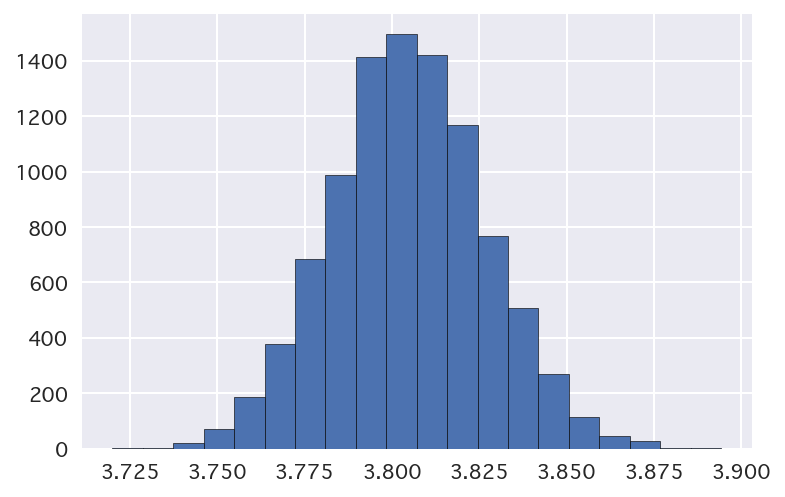

In [102]:
plt.hist(m_list, bins=20)
plt.show()

In [103]:
# 様々なのグラフ描画 アニメーション
rd.seed = 71
num_frame = 50.

def animate(nframe):
    global num_frame, fig
    print("\r i={}".format(int(nframe)), end="")
    plt.clf()
    m = m_list[int(nframe)]
    rvs = rvs_list[int(nframe)]
    plt.hist(rvs, bins=30, normed=True)
    plt.plot([m, m], [0, .5], "r")
    plt.xlim(0,30)
    plt.title("i={}".format(int(nframe)))

fig = plt.figure(figsize=(9,5))
anim = ani.FuncAnimation(fig, animate, frames=int(num_frame))
anim.save('mixed_dist2.gif', writer='imagemagick', fps=5, dpi=128)

plt.close()

 i=49

In [104]:
ipyd.Image(url='mixed_dist2.gif?{}'.format(rd.uniform()), height=800, width=800)